In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

/Users/edilbekabdyrakhmanov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Load your pickle data
subdirectory = "/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/3_Model/Neural_Net_Edilbek/pickle_data_3"
training_features = pd.read_pickle(f"{subdirectory}/training_features.pkl")
validation_features = pd.read_pickle(f"{subdirectory}/validation_features.pkl")
test_features = pd.read_pickle(f"{subdirectory}/test_features.pkl")
training_labels = pd.read_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels = pd.read_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels = pd.read_pickle(f"{subdirectory}/test_labels.pkl")

# Drop 'Datum' column if present
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)

In [5]:
# Improved neural net architecture
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,449 (17.38 KB)

 Non-trainable params: 224 (896.00 B)

In [14]:
# Compile & train with EarlyStopping
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    training_features, training_labels,
    epochs=200,
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stop]
)

# Save the improved model
model.save("improved_python_model.h5")


Epoch 1/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5506.8018 - val_loss: 3132.8970
Epoch 2/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 5520.4707 - val_loss: 3602.3140
Epoch 3/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 5451.7769 - val_loss: 3618.5112
Epoch 4/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 5535.3525 - val_loss: 3559.3015
Epoch 5/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 5093.7148 - val_loss: 3182.4436
Epoch 6/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 5557.4624 - val_loss: 3456.4272
Epoch 7/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 5426.7461 - val_loss: 3568.3896
Epoch 8/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 4396.3032 - val_loss: 3440.1665
Epoch 9/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 5279.9663 - val_loss: 3443.5330
Epoch 10/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 5341.7373 - val_loss: 3576.7126
Epoch 11/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/

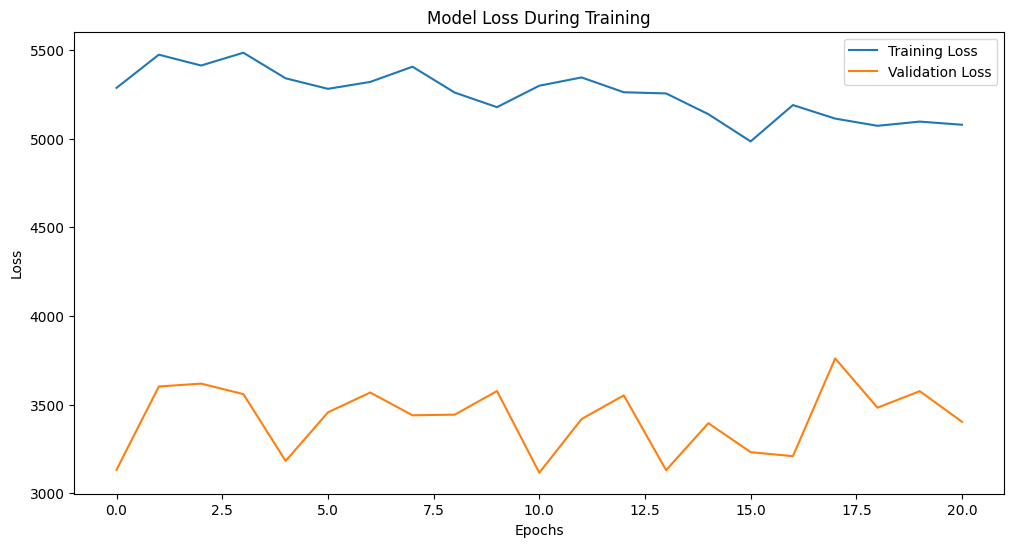

In [15]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Robust MAPE function
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = (y_true != 0) & (~np.isnan(y_true)) & (~np.isnan(y_pred))
    if np.sum(non_zero_mask) == 0:
        return np.nan
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Predictions
train_preds = model.predict(training_features).flatten()
val_preds = model.predict(validation_features).flatten()

# Compute MAPE
train_mape = mape(training_labels.values.flatten(), train_preds)
val_mape = mape(validation_labels.values.flatten(), val_preds)

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
Training MAPE: 22.14%
Validation MAPE: 21.98%


In [17]:
from sklearn.metrics import r2_score

# Compute R^2
train_r2 = r2_score(training_labels.values.flatten(), train_preds)
val_r2 = r2_score(validation_labels.values.flatten(), val_preds)

print(f"Training R^2: {train_r2:.4f}")
print(f"Validation R^2: {val_r2:.4f}")


Training R^2: 0.8034
Validation R^2: 0.8176
